In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

import seaborn as sns

vendor_payments = pd.read_csv('ct_VendorPayments.csv')

In [3]:
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod
0,8/14/2017 0:00,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2
1,8/14/2017 0:00,AIMS PVIC,380.00,100,GENERAL,25411,IRRIGATION REPAIR,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2
2,8/14/2017 0:00,AIMS PVIC,2125.00,200,TRANSPORTATION,20810,GRADING AND DRAINAGE,52390,MISC MAINTENANCE AND REPAIR,2018,2
3,8/14/2017 0:00,AIMS PVIC,15658.03,603,WATER RECLAMATION,29321,SEWER SYSTEM,52190,OTHER PROFESSIONAL SERVICES,2018,2
4,8/14/2017 0:00,ALL CITY TOWING,583.00,700,FLEET MANAGEMENT,20706,FLEET MANAGEMENT OPERATIONS,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2


In [5]:
vendor_payments.dtypes

PaymentDate          object
VendorName           object
PaymentAmount       float64
Fund                  int64
FundDescription      object
Center               object
CenterName           object
Account               int64
AccountName          object
FiscalYear            int64
AccountingPeriod      int64
dtype: object

In [13]:
fund_payments = vendor_payments.groupby(['FundDescription'])['PaymentAmount'].sum().sort_values(ascending=False).head(15)
fund_payments

FundDescription
GENERAL                              44507852.60
WATER                                33524119.64
BENEFITS SELF INSURANCE              31977066.95
CIP AIRPORT                          18602434.41
CIP WATER                            15878392.83
TRANSPORTATION                       14885857.69
TOURISM DEVELOPMENT                  14175547.06
CIP WATER RECLAMATION                13231773.47
CIP TRANSPORTATION PRIVILEGE TAX     12622688.68
CIP GENERAL                          11481031.24
WATER RECLAMATION                    10422529.18
FLEET MANAGEMENT                      9112504.58
CIP FEDERAL GRANTS                    8931516.70
2017A MPC BONDS-WATER                 7339598.11
SOLID WASTE MANAGEMENT                4509578.02
Name: PaymentAmount, dtype: float64

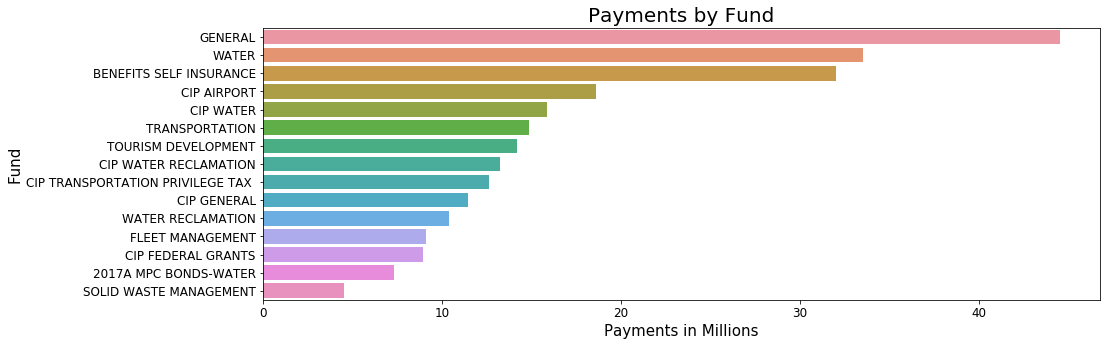

In [53]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(fund_payments.values, fund_payments.index)
plt.title('Payments by Fund',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Fund',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

In [19]:
center_payments = vendor_payments.groupby(['CenterName'])['PaymentAmount'].sum().sort_values(ascending=False).head(15)
center_payments

CenterName
CIGNA OAP IN-NETWORK                   23013387.73
CAP TREATMENT PLANT                    18780287.25
AIRPORT TERMINAL AREA RDVLOPMENT PR    18515382.26
DESTINATION MARKETING CONTRACT          9879556.95
VEHICLE ACQUISITIONS                    7181229.59
BOOSTER STATIONS                        5855296.26
FLW 24 TRANS MAIN & BOOSTER MOD         4743386.50
CIGNA OAP                               4690873.28
PAVEMENT OVERLAY PROGRAM                4608992.75
CULTURAL COUNCIL CONTRACT               4576580.00
ASPHALT & MAINTENANCE                   4560945.96
WASTEWATER COLLECTION SYSTEM IMPROV     4464733.26
WATER TREATMENT FACILITY IMPR           4321891.89
DATA CENTER RESILIENCY PLAN             4052343.91
UTILITIES                               3909870.96
Name: PaymentAmount, dtype: float64

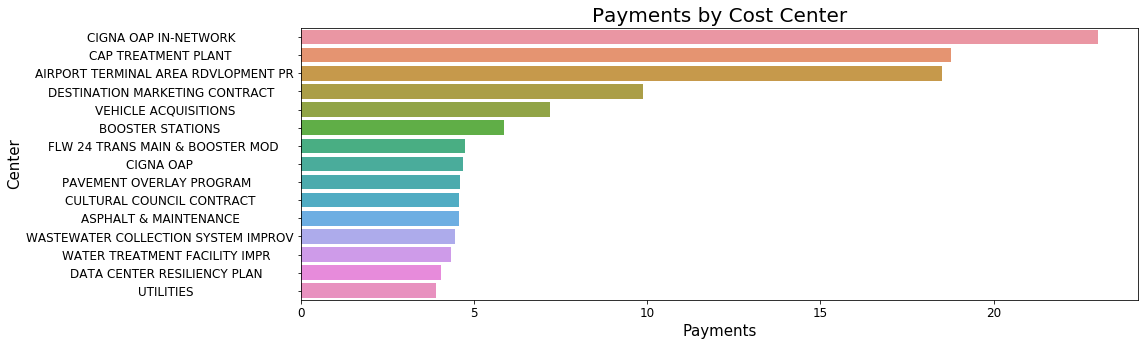

In [47]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(center_payments.values, center_payments.index)
plt.title('Payments by Cost Center',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Center',fontsize=15)
plt.xlabel('Payments',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

plt.tick_params(labelsize=12)

In [24]:
account_payments = vendor_payments.groupby(['AccountName'])['PaymentAmount'].sum().sort_values(ascending=False).head(15)
account_payments

AccountName
MEDICAL CLAIMS                         29812330.64
ELECTRIC                               19573764.35
CONT - BUILDINGS                       19287362.14
PURCHASED WATER                        14856617.20
CONT - STREETS                         13525350.32
CONT - WATER - DISTRIBUTION SYSTEM     11474641.56
CONT - OTHER                           10400798.36
DESTINATION MARKETING CONTRACT          9879556.95
MOTOR VEHICLES                          7085677.16
OTHER PROFESSIONAL SERVICES             6237781.02
CONT - WATER - BOOSTER STATION          6016847.63
CULTURAL COUNCIL CONTRACT               4576580.00
EQUP - MOTOR VEHICLES                   4575432.00
SOFTWARE MAINT & LICENSING              4475041.15
MAINT - MACHINERY, EQUIP & AUTOS        4288191.37
Name: PaymentAmount, dtype: float64

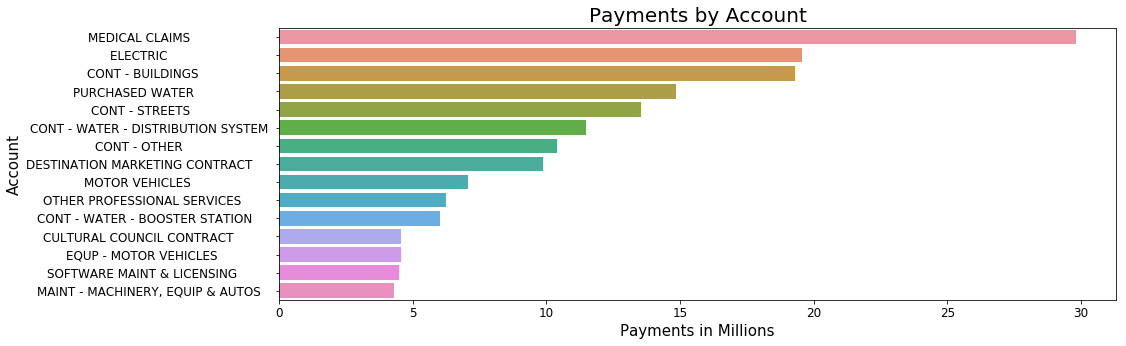

In [52]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(account_payments.values, account_payments.index)
plt.title('Payments by Account',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Account',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))